In [2]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


{'n_clusters': 10}


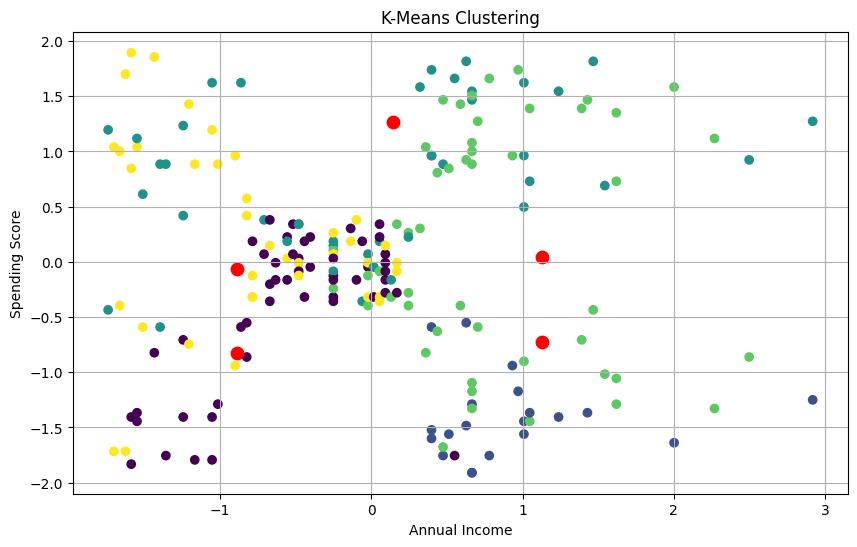

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
X = df.iloc[:, 1:5]

sc = StandardScaler()
X = sc.fit_transform(X)

model = KMeans(n_clusters = 5, random_state = 42)

params ={
    'n_clusters' : [2,3,4,5,6,7,8,9,10]
}

grid_cv = GridSearchCV(model, params, cv = 5)
grid_cv.fit(X)
print(grid_cv.best_params_)

model.fit(X)
labels = model.labels_
centroid = model.cluster_centers_

plt.figure(figsize = (10,6))
plt.scatter(X[:, 2], X[:, 3], c = labels)
plt.scatter(centroid[:, 0], centroid[:, 1], s =80, color = 'red')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.grid()
plt.show()